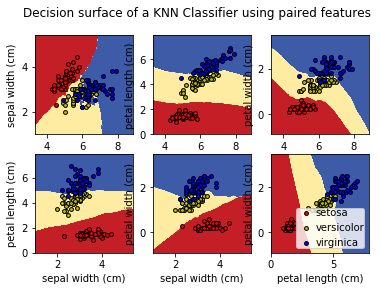

In [14]:
% matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Parameters
N_CLASSES = 3
PLOT_STEP = 0.02

N_ROWS = 2
N_COLS = 3

# Load data
iris = load_iris()


for idx, pair in enumerate(
        [[0, 1], [0, 2], [0, 3],
         [1, 2], [1, 3], [2, 3]]
):
    # We only take the two corresponding features
    iris_x = iris.data[:, pair]
    iris_y = iris.target

    # Train
    clf = KNeighborsClassifier().fit(iris_x, iris_y)

    # Plot the decision boundary
    plt.subplot(N_ROWS, N_COLS, idx + 1)

    x_min, x_max = iris_x[:, 0].min() - 1, iris_x[:, 0].max() + 1
    y_min, y_max = iris_x[:, 1].min() - 1, iris_x[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, PLOT_STEP),
        np.arange(y_min, y_max, PLOT_STEP)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(N_CLASSES), ['r', 'y', 'b']):
        idx = np.where(iris_y == i)
        plt.scatter(
            x=iris_x[idx, 0], y=iris_x[idx, 1],
            c=color, label=iris.target_names[i],
            cmap=plt.cm.RdYlBu, edgecolor='black', s=15
        )

plt.suptitle('Decision surface of a KNN Classifier using paired features')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)

plt.show()
